# Import Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_excel("/content/drive/MyDrive/BJIT Materials/Dataset/Merged commute-time (combined).xlsx")

# Data Preprocessing

### Missing Values

In [77]:
# Check for missing values
df.isnull().sum()

,0
Age,0
Gender,0
Major,1
Distance from home to workplace(KM),0
Transortation Medium,9
Traffic during commuting,1
Daily commute time(Min),2


In [78]:

# Replace null values with the median for numerical columns
for col in df.select_dtypes(include=np.number):
    df.loc[:, col] = df[col].fillna(df[col].median())

# Replace null values with mode for categorical columns
for col in df.select_dtypes(exclude=np.number):
     df.loc[:, col] = df[col].fillna(df[col].mode()[0])

# Verify if there are any remaining null values
print(df.isnull().sum())

Age                                    0
Gender                                 0
Major                                  0
Distance from home to workplace(KM)    0
Transortation Medium                   0
Traffic during commuting               0
Daily commute time(Min)                0
dtype: int64


### Value Checks

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  1107 non-null   int64  
 1   Gender                               1107 non-null   object 
 2   Major                                1107 non-null   object 
 3   Distance from home to workplace(KM)  1107 non-null   float64
 4   Transortation Medium                 1107 non-null   object 
 5   Traffic during commuting             1107 non-null   object 
 6   Daily commute time(Min)              1107 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 60.7+ KB


#### Gender

In [80]:
df['Gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [81]:

df['Gender'] = df['Gender'].replace('Other', 'Female')

# Verify the changes
print(df['Gender'].unique())

['Male' 'Female']


#### Transortation Medium

In [82]:
df['Transortation Medium'].unique()

array(['Bus', 'Walk', 'Rickshaw', 'Car', 'Bike', 'Rickshaw ', 'Bicycle',
       'Cycle ', 'Cycle', 'Riskha', 'Autorickshaw ', 'AutoRicshaw',
       'Autorickshaw', 'bicycle ', 'rickshaw'], dtype=object)

In [83]:

df['Transortation Medium'] = df['Transortation Medium'].replace('Riskha', 'Rickshaw')
df['Transortation Medium'] = df['Transortation Medium'].replace('Rickshaw ', 'Rickshaw')
df['Transortation Medium'] = df['Transortation Medium'].replace('Autorickshaw ', 'Rickshaw')
df['Transortation Medium'] = df['Transortation Medium'].replace('AutoRicshaw', 'Rickshaw')
df['Transortation Medium'] = df['Transortation Medium'].replace('Autorickshaw', 'Rickshaw')
df['Transortation Medium'] = df['Transortation Medium'].replace('rickshaw', 'Rickshaw')
df['Transortation Medium'] = df['Transortation Medium'].replace('Bicycle', 'Cycle')
df['Transortation Medium'] = df['Transortation Medium'].replace('bicycle ', 'Cycle')
df['Transortation Medium'] = df['Transortation Medium'].replace('Cycle ', 'Cycle')

# Verify the changes
print(df['Transortation Medium'].unique())

['Bus' 'Walk' 'Rickshaw' 'Car' 'Bike' 'Cycle']


#### Traffic during commuting

In [84]:
df['Traffic during commuting'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

#### Daily commute time(Min)

In [85]:
df['Daily commute time(Min)'].unique()

array([200. ,  20. , 120. ,  65. ,  90. , 100. , 220. ,   1. ,  35. ,
        60. ,  75. ,  40. , 180. , 150. ,   4. , 110. ,  25. ,  80. ,
        45. ,  95. , 130. , 181.5, 102. ,  93.6,  90.3, 139.2,  53.2,
        92. , 110.6, 117.6,  58.8,  81.9,   6. ,  34.3,  44.1,  75.6,
        77.6,  31.2,  70. ,  23.8,  14. ,  72. ,  80.8,  16. ,  96.6,
       195. , 129.6,  91.2,  19.6,  27. , 104.8,  46.4, 106. , 161. ,
        20.4,  51. ,  59.5,  21.6,  76.3,  71.4,  23.1,  42.4, 107.8,
        59.2, 184.8, 178.8,  73.5,  16.5,  77. ,  13. ,  34.5,  99.6,
       100.5,  18. ,  64.5,  95.2, 165.2, 115.5, 119. , 107. , 169.2,
        69. ,  42. ,  67.2,  78.4, 205.8,  61.5,  57. ,  30.1, 112.8,
       145.6,  66.5,  30.8,  94. ,  66. ,  86.4,  25.2, 138. , 116. ,
        49. ,   9. , 148.4, 222. ,  52.5, 166.5,  28. ,  64. , 144.2,
        87. , 157.5, 169.5, 134. ,  85.2,  62.4, 177.6, 158.2,  48.3,
       720. ,   5. ,  30. , 480. ,  84. , 240. ,  10. ,   2. , 630. ,
         3. , 129. ,

### Label Encoded features for a better comparison among numerical values.

In [86]:

# Encode categorical variables
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Transortation Medium'] = df['Transortation Medium'].map({'Bus': 0, 'Walk': 1, 'Rickshaw': 2, 'Car': 3, 'Bike': 4, 'Cycle': 5 })
df['Traffic during commuting'] = df['Traffic during commuting'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Display the processed DataFrame
df.head(20)


,Age,Gender,Major,Distance from home to workplace(KM),Transortation Medium,Traffic during commuting,Daily commute time(Min)
0,25,0,CSE,11.0,0,2,200.0
1,25,0,CSE,2.0,1,0,20.0
2,25,0,CSE,4.0,0,1,120.0
3,24,1,CSE,4.3,0,2,120.0
4,25,0,CSE,6.0,0,1,65.0
5,25,0,CSE,9.0,0,1,90.0
6,25,0,CSE,4.0,0,2,100.0
7,25,0,CSE,16.0,0,2,220.0
8,25,0,CSE,6.0,0,2,1.0
9,24,0,CSE,2.0,2,1,35.0


In [87]:

from sklearn.preprocessing import StandardScaler

# Assuming 'Distance from home to workplace(KM)' is a column in your DataFrame 'df'
scaler = StandardScaler()
df['Distance from home to workplace(KM)'] = scaler.fit_transform(df[['Distance from home to workplace(KM)']])

In [88]:
# Summary statistics
df.describe()


,Age,Gender,Distance from home to workplace(KM),Transortation Medium,Traffic during commuting,Daily commute time(Min)
count,1107.000000,1107.000000,1.107000e+03,1107.000000,1107.000000,1107.000000
mean,25.725384,0.415537,1.026981e-16,1.398374,0.980126,94.562963
std,5.673175,0.493037,1.000452e+00,1.514641,0.807718,77.037943
min,18.000000,0.000000,-1.078449e+00,0.000000,0.000000,1.000000
25%,23.000000,0.000000,-5.652093e-01,0.000000,0.000000,40.000000
50%,25.000000,0.000000,-1.802795e-01,1.000000,1.000000,84.000000
75%,27.000000,1.000000,2.046503e-01,3.000000,2.000000,130.000000
max,60.000000,1.000000,5.337047e+00,5.000000,2.000000,780.000000


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107 entries, 0 to 1106
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  1107 non-null   int64  
 1   Gender                               1107 non-null   int64  
 2   Major                                1107 non-null   object 
 3   Distance from home to workplace(KM)  1107 non-null   float64
 4   Transortation Medium                 1107 non-null   int64  
 5   Traffic during commuting             1107 non-null   int64  
 6   Daily commute time(Min)              1107 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 60.7+ KB


## Removing Outliers

In [126]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Apply to all numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns
for col in numerical_cols:
    df = remove_outliers_iqr(df, col)

print(df.describe())

              Age      Gender  Distance from home to workplace(KM)  \
count  931.000000  931.000000                           931.000000   
mean    24.588614    0.397422                            -0.233027   
std      2.403725    0.489628                             0.465931   
min     19.000000    0.000000                            -1.078449   
25%     23.000000    0.000000                            -0.565209   
50%     25.000000    0.000000                            -0.231603   
75%     26.000000    1.000000                             0.076340   
max     30.000000    1.000000                             0.974510   

       Transortation Medium  Traffic during commuting  Daily commute time(Min)  
count            931.000000                931.000000               931.000000  
mean               1.346939                  0.978518                85.448228  
std                1.494412                  0.798904                54.365925  
min                0.000000                  

# EDA

## ---------------- UNIVARIATE ANALYSIS ----------------

### Age

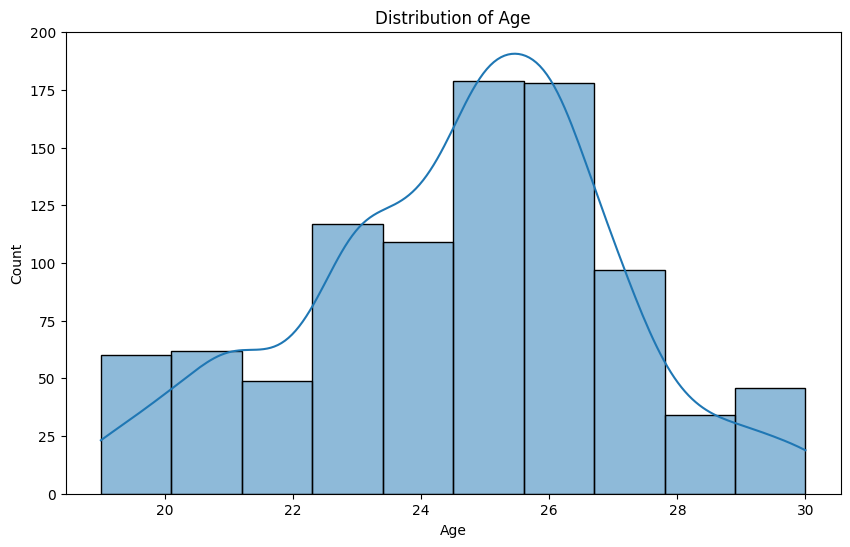

In [127]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Distribution of Age')
plt.show()

### Distance from home to workplace (KM)

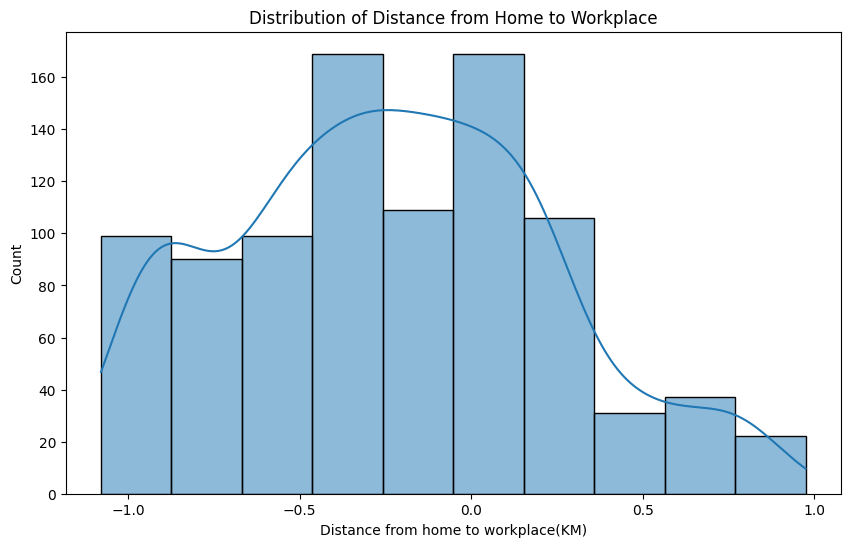

In [128]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance from home to workplace(KM)'], kde=True, bins=10)
plt.title('Distribution of Distance from Home to Workplace')
plt.show()

#### We can see here that most people actually come from 4-8 KM distance

### Daily commute time (Min)

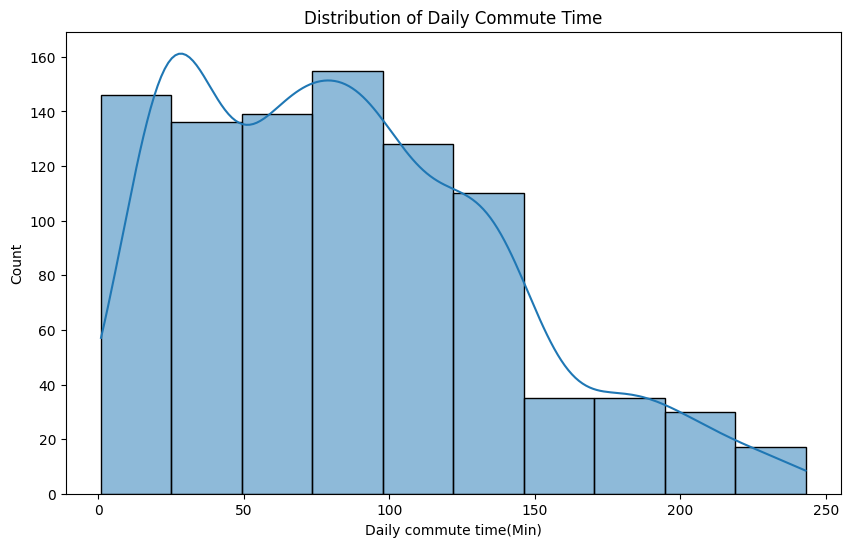

In [129]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily commute time(Min)'], kde=True, bins=10)
plt.title('Distribution of Daily Commute Time')
plt.show()

#### Daily Commute time do not show any pattern here, Two spikes can be seen, One during 75 min another small spike in 200 min

### Boxplot for numerical variables

In [130]:
# Compute summary statistics
df[['Distance from home to workplace(KM)', 'Daily commute time(Min)']].describe()


,Distance from home to workplace(KM),Daily commute time(Min)
count,931.000000,931.000000
mean,-0.233027,85.448228
std,0.465931,54.365925
min,-1.078449,1.000000
25%,-0.565209,35.000000
50%,-0.231603,79.000000
75%,0.076340,120.000000
max,0.974510,243.000000


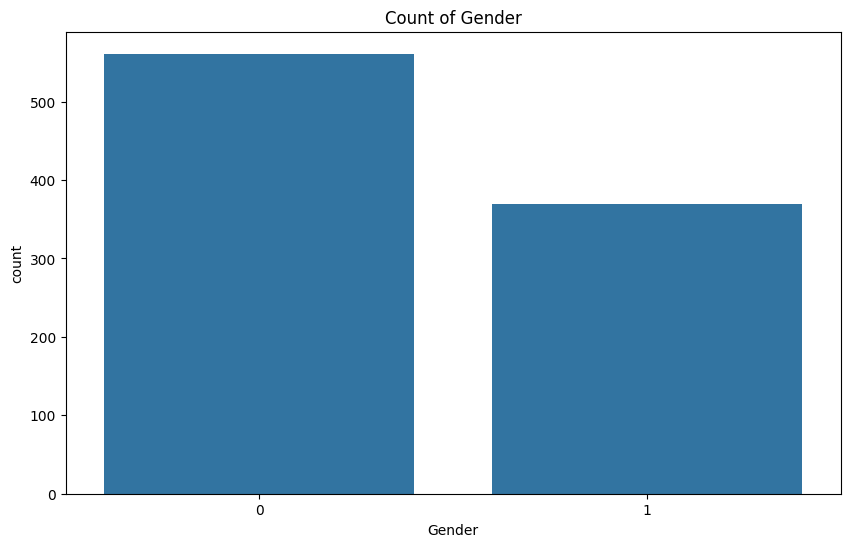

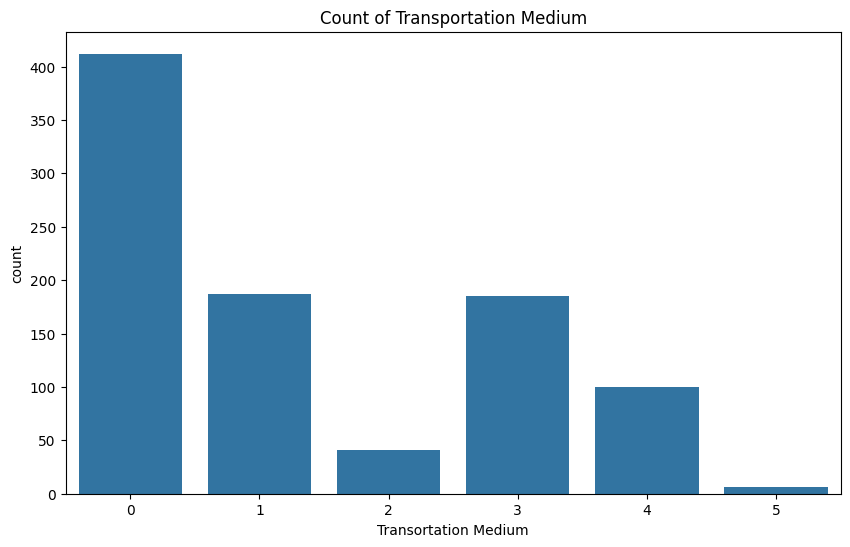

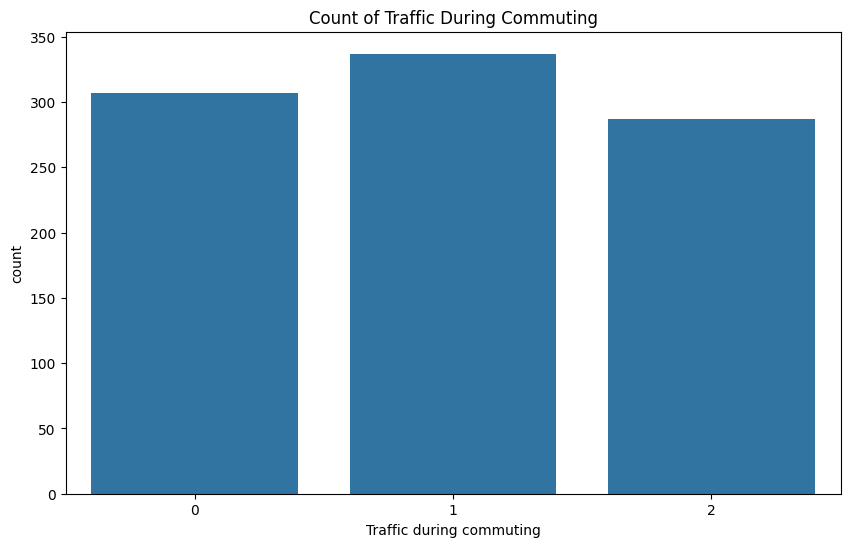

In [131]:
# Count plot for categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x=df['Gender'])
plt.title('Count of Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=df['Transortation Medium'])
plt.title('Count of Transportation Medium')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x=df['Traffic during commuting'])
plt.title('Count of Traffic During Commuting')
plt.show()


### We can see most people use BUS and face Medium to High Traffic.

## ---------------- BIVARIATE ANALYSIS ----------------

### Scatter plot: Distance vs. Daily Commute Time

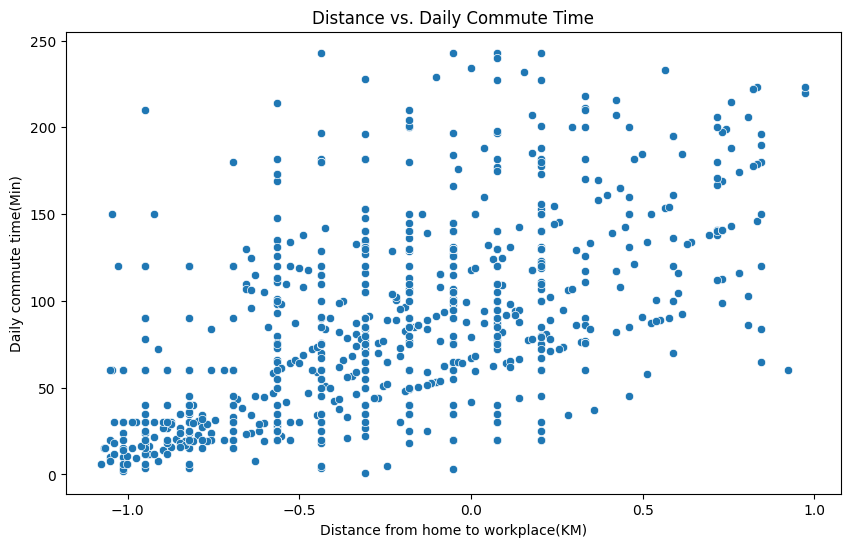

In [132]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Distance from home to workplace(KM)'], y=df['Daily commute time(Min)'])
plt.title('Distance vs. Daily Commute Time')
plt.show()


### Box plot: Traffic vs. Daily Commute Time

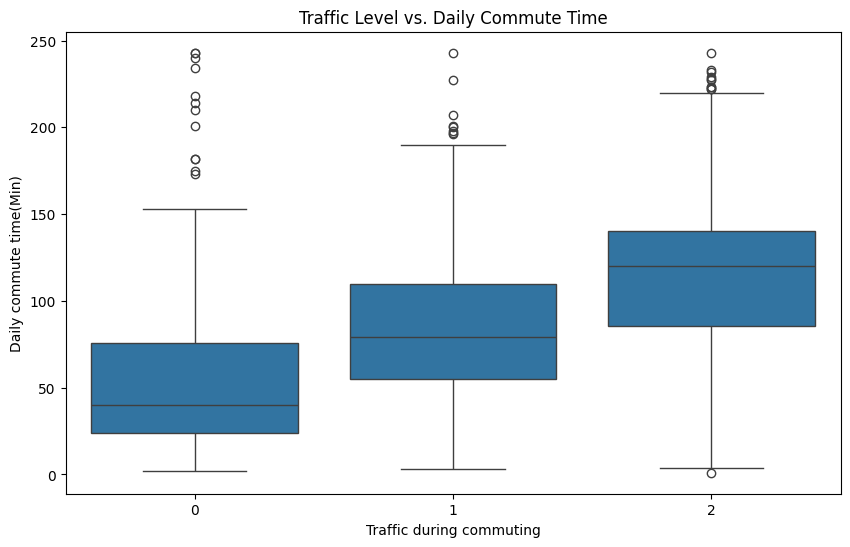

In [133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Traffic during commuting'], y=df['Daily commute time(Min)'])
plt.title('Traffic Level vs. Daily Commute Time')
plt.show()


Higher the traffic level, larger the average commute time.

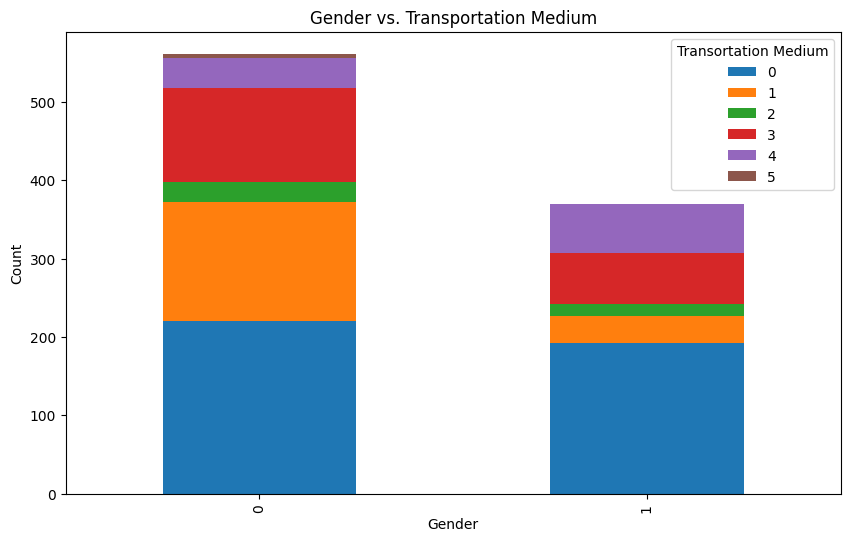

In [134]:
# Cross-tabulation of Gender vs. Transportation Medium
gender_transportation = pd.crosstab(df['Gender'], df['Transortation Medium'])
gender_transportation.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Gender vs. Transportation Medium')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


## ---------------- MULTIVARIATE ANALYSIS ----------------

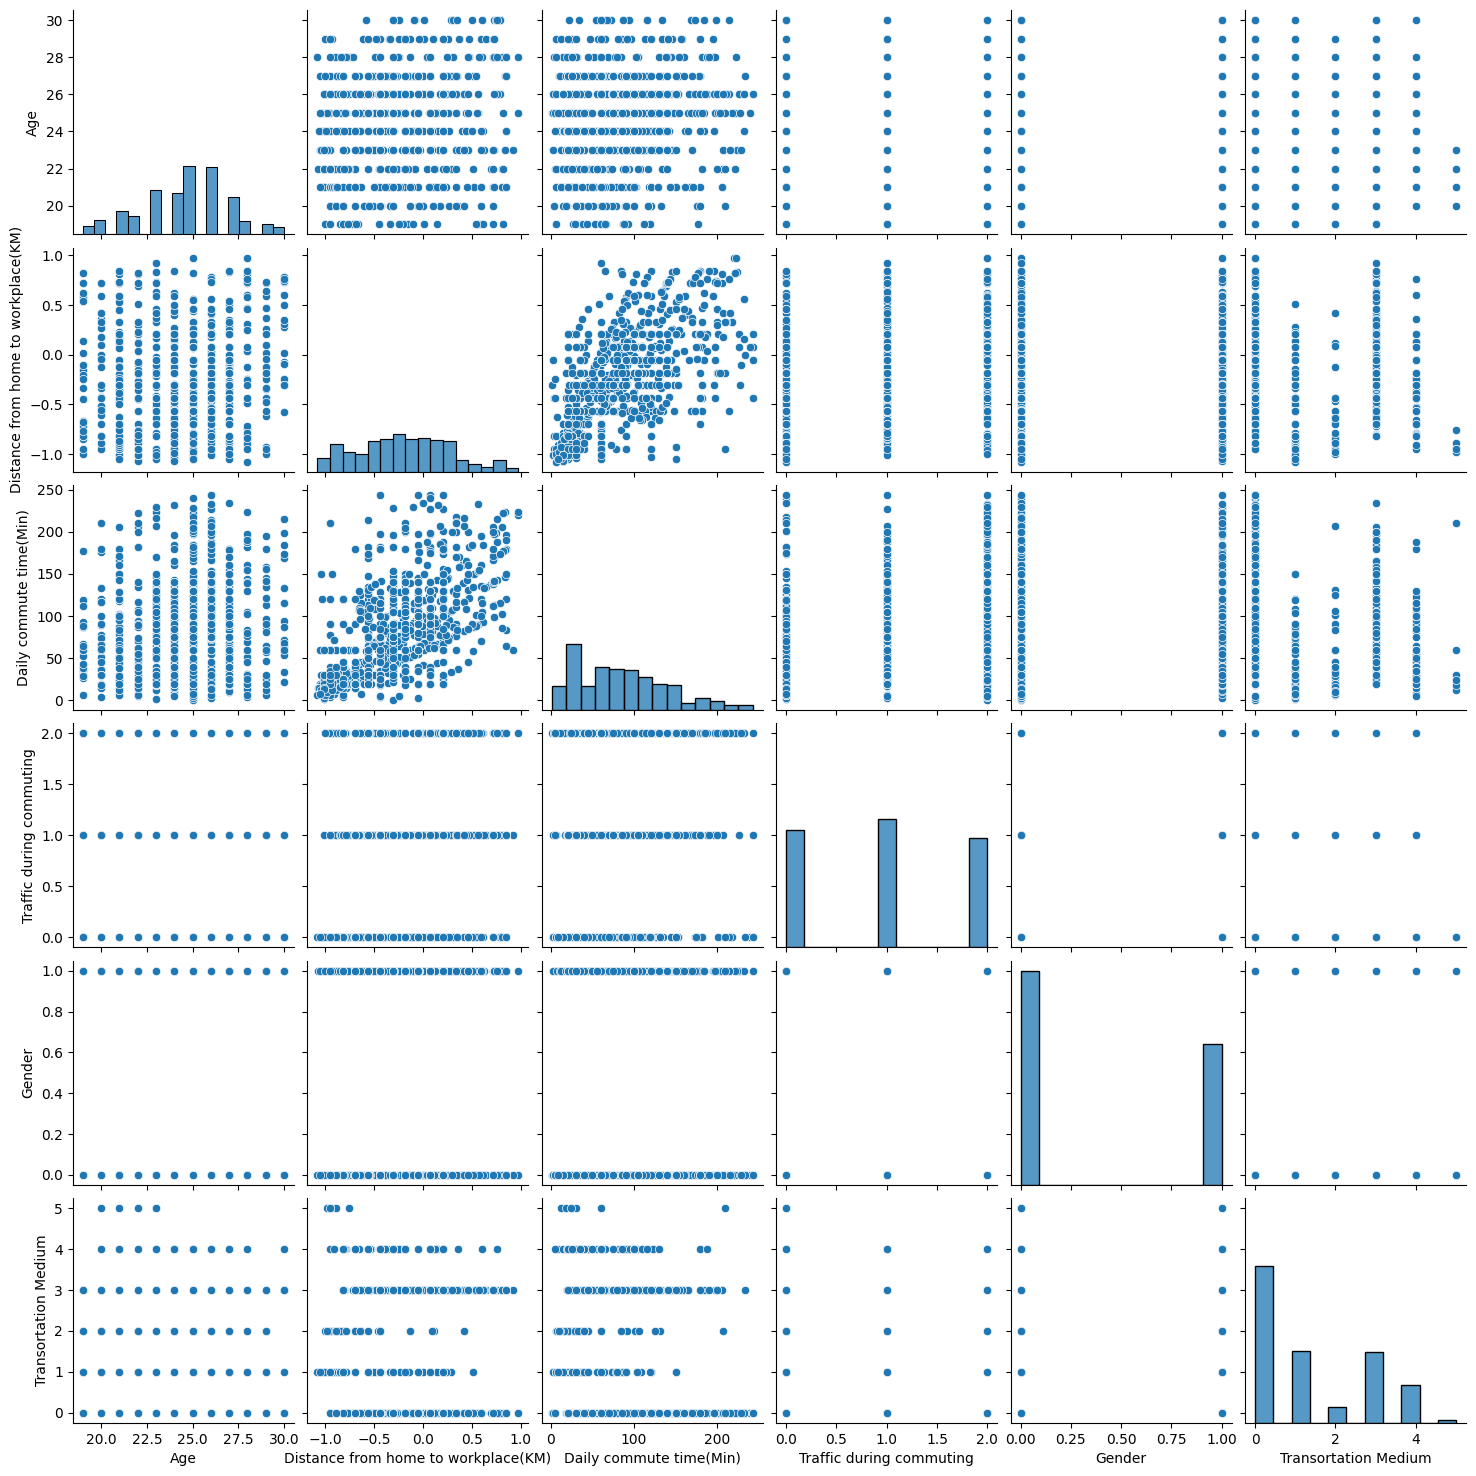

In [135]:
# Pairplot to visualize relationships between numerical variables
sns.pairplot(df[['Age', 'Distance from home to workplace(KM)', 'Daily commute time(Min)', 'Traffic during commuting', 'Gender', 'Transortation Medium']])
plt.show()


### We can see a linear relationship between **Daily commute time** and **Distance from home to workplace**

# Regression Task

## Regression Algorithm

In [140]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define features (X) and target variable (y)
X = df[['Distance from home to workplace(KM)', 'Traffic during commuting', 'Transortation Medium', 'Age']]
y = df['Daily commute time(Min)']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

print("Linear Regression:")
print(f"Mean Squared Error: {linear_mse}")
print(f"R-squared: {linear_r2}")


Linear Regression:
Mean Squared Error: 1486.6765901556332
R-squared: 0.5516562897920563


# **Summary of Analysis**

This notebook performs an exploratory data analysis (EDA) and builds a linear regression model to predict daily commute time. Here's a breakdown:

**1. Data Loading and Preprocessing**
   - The code begins by loading a dataset from an Excel file named `Merged commute-time (combined).xlsx` into a Pandas DataFrame.
   - **Missing Value Handling:** Missing values in numerical columns are imputed using the median, and missing values in categorical columns are imputed using the mode.
   - **Data Type Inspection**: The code uses `df.info()` to inspect the data types of the columns.
   - **Value Checks**: The unique values of categorical columns such as 'Gender' and 'Transortation Medium' are inspected, and inconsistencies are corrected by standardizing the values.
   - **Label Encoding:** Categorical features ('Gender', 'Transortation Medium', 'Traffic during commuting') are label encoded to convert them into numerical values, enabling their use in numerical analysis.
   - **Feature Scaling:** The 'Distance from home to workplace(KM)' column is standardized using `StandardScaler` to ensure all features have a similar scale.
   - **Outlier Removal:** Outliers are removed using the IQR method from all the numerical columns.
   
**2. Exploratory Data Analysis (EDA)**
   - **Univariate Analysis:**
      - Histograms are used to visualize the distributions of 'Age', 'Distance from home to workplace(KM)', and 'Daily commute time(Min)'.
       - We can see that the spike in 'Age' is around 24-27 years old.
       - Average Distance from home to workplace is between **3-7** km.
       - Daily Comute time spike is around **75-200** min
      - Count plots are used to show the distributions of categorical variables ('Gender', 'Transortation Medium', and 'Traffic during commuting').
   - **Bivariate Analysis:**
      - Scatter plots show the relationship between 'Distance from home to workplace(KM)' and 'Daily commute time(Min)'.
      - Box plots illustrate the relationship between 'Traffic during commuting' and 'Daily commute time(Min)'.
      - A stacked bar plot visualizes the relationship between 'Gender' and 'Transortation Medium'.
   - **Multivariate Analysis:**
      - A pairplot visualizes the relationships between numerical variables in the dataset.

**3. Regression Model**
   - **Feature Selection:** The independent variables ('Distance from home to workplace(KM)', 'Traffic during commuting', 'Transortation Medium', 'Age') and the dependent variable ('Daily commute time(Min)') are defined.
   - **Data Splitting:** The data is split into training and testing sets using an 80-20 split.
   - **Model Training:** A linear regression model is trained using the training data.
   - **Model Evaluation:** The model's performance is evaluated using Mean Squared Error (MSE) and R-squared (R²) on the test data.

**Why Linear Regression?**

Linear Regression was chosen for this regression task because:

   - **Relationship between Variables:** The scatter plots in the bivariate analysis suggested a potential linear relationship between the 'Distance from home to workplace(KM)' and 'Daily commute time(Min)'. This makes linear regression a reasonable starting point.
   - **Simplicity and Interpretability:** Linear regression is a simple and easily interpretable model. The coefficients of the model can provide insights into the impact of each feature on the commute time.
   - **Baseline Model:** Linear regression is often used as a baseline model for regression tasks. It helps to understand the basic relationship between the independent and dependent variables before moving on to more complex models.
  - **Initial Exploration:** The goal of the analysis appears to be an initial exploration of the dataset and a basic prediction of the commute time. Linear regression fulfills this purpose by providing a straightforward, easy-to-implement approach.

In summary, this notebook successfully preprocessed the commute time dataset, performed EDA to understand the key relationships, and built a linear regression model for predicting daily commute time. Linear Regression was chosen primarily due to the apparent linear relationship between distance and commute time, its simplicity, interpretability, and its role as a good baseline model.